In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import astropy 
%matplotlib inline

In [2]:
search_ffi = lk.search_tesscut('TIC 182582608 ')
search_tpf = lk.search_targetpixelfile('TIC 182582608 ')
search_lcf = lk.search_lightcurve('TIC 182582608 ')

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 07,2019,TESScut,1426,TIC 182582608,0.0
1,TESS Sector 08,2019,TESScut,1426,TIC 182582608,0.0
2,TESS Sector 34,2021,TESScut,475,TIC 182582608,0.0
3,TESS Sector 35,2021,TESScut,475,TIC 182582608,0.0


In [21]:
search_result_s35 = lk.search_tesscut('TIC 182582608', sector=35)
cut_s35 = search_result_s35.download(cutout_size=20)
print(cut_s35)

TessTargetPixelFile(TICID: TIC 182582608)


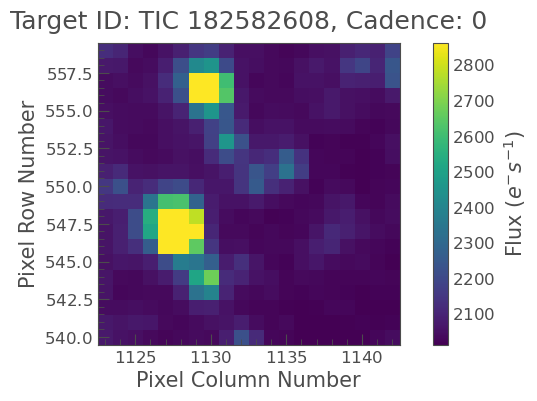

In [24]:
cut_s35.plot();

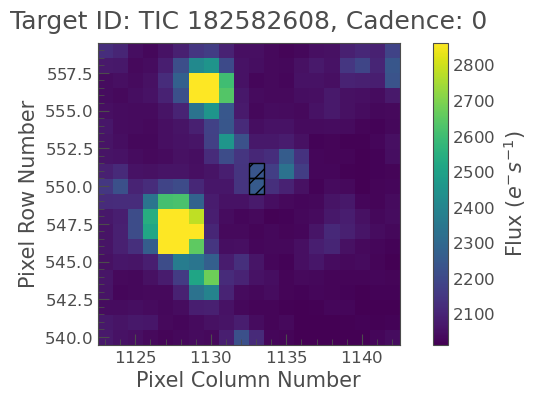

In [28]:
s35_target_mask = cut_s35.create_threshold_mask(threshold=5, reference_pixel='center')
s35_n_target_pixels = s35_target_mask.sum()
s35_n_target_pixels
cut_s35.plot(aperture_mask=s35_target_mask, mask_color='k');

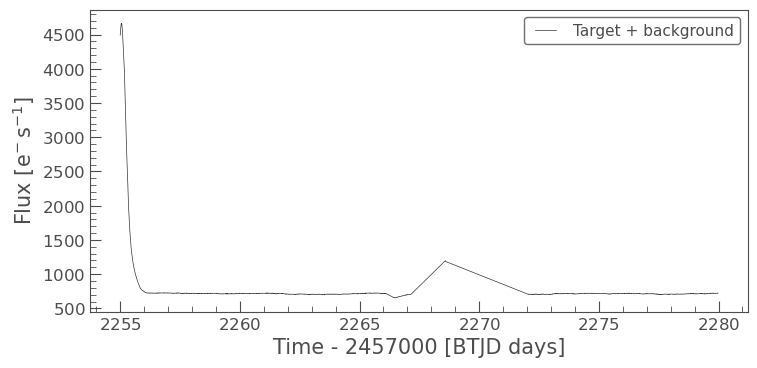

In [29]:
s35_target_lc = cut_s35.to_lightcurve(aperture_mask=s35_target_mask)
s35_target_lc.plot(label='Target + background');

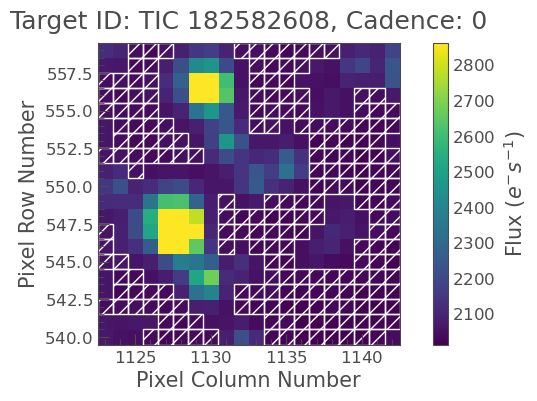

In [30]:
s35_background_mask = ~cut_s35.create_threshold_mask(threshold=0.005, reference_pixel= None)
cut_s35.plot(aperture_mask=s35_background_mask, mask_color='w');

In [31]:
s35_n_background_pixels = s35_background_mask.sum()
s35_n_background_pixels

202

In [32]:
s35_background_lc_per_pixel = cut_s35.to_lightcurve(aperture_mask=s35_background_mask) / s35_n_background_pixels

In [33]:
s35_background_estimate_lc = s35_background_lc_per_pixel * s35_n_target_pixels

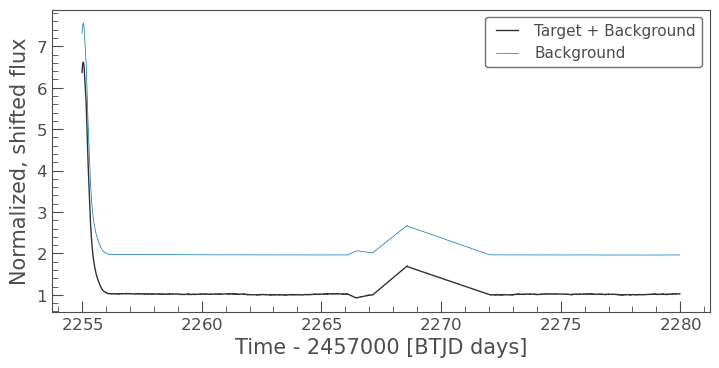

In [19]:
common_normalization = np.nanpercentile(s35_target_lc.flux, 10)
ax = (s35_target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(s35_background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux');

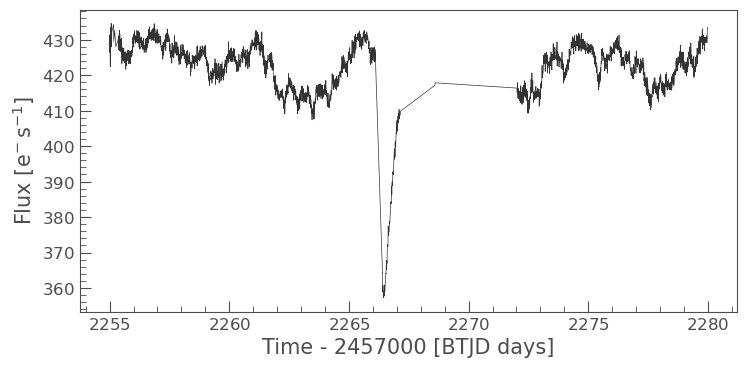

In [34]:
s35_corrected_lc = s35_target_lc - s35_background_estimate_lc.flux
s35_corrected_lc.plot();
